In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from matplotlib.ticker import NullFormatter

import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_df=pd.read_csv('/content/drive/MyDrive/VIT/project/Salary Data.csv')

In [4]:
data_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
#Number of rows
data_df.shape[0]

375

In [6]:
counts = data_df.nunique()
counts

Age                     31
Gender                   2
Education Level          3
Job Title              174
Years of Experience     28
Salary                  36
dtype: int64

In [7]:
data_df.drop_duplicates(inplace=True)

In [8]:
data_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [9]:
data_df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [10]:
data_df.isna().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [11]:
data_df.replace(' ?' , np.nan ,inplace=True)
data_df.isna().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

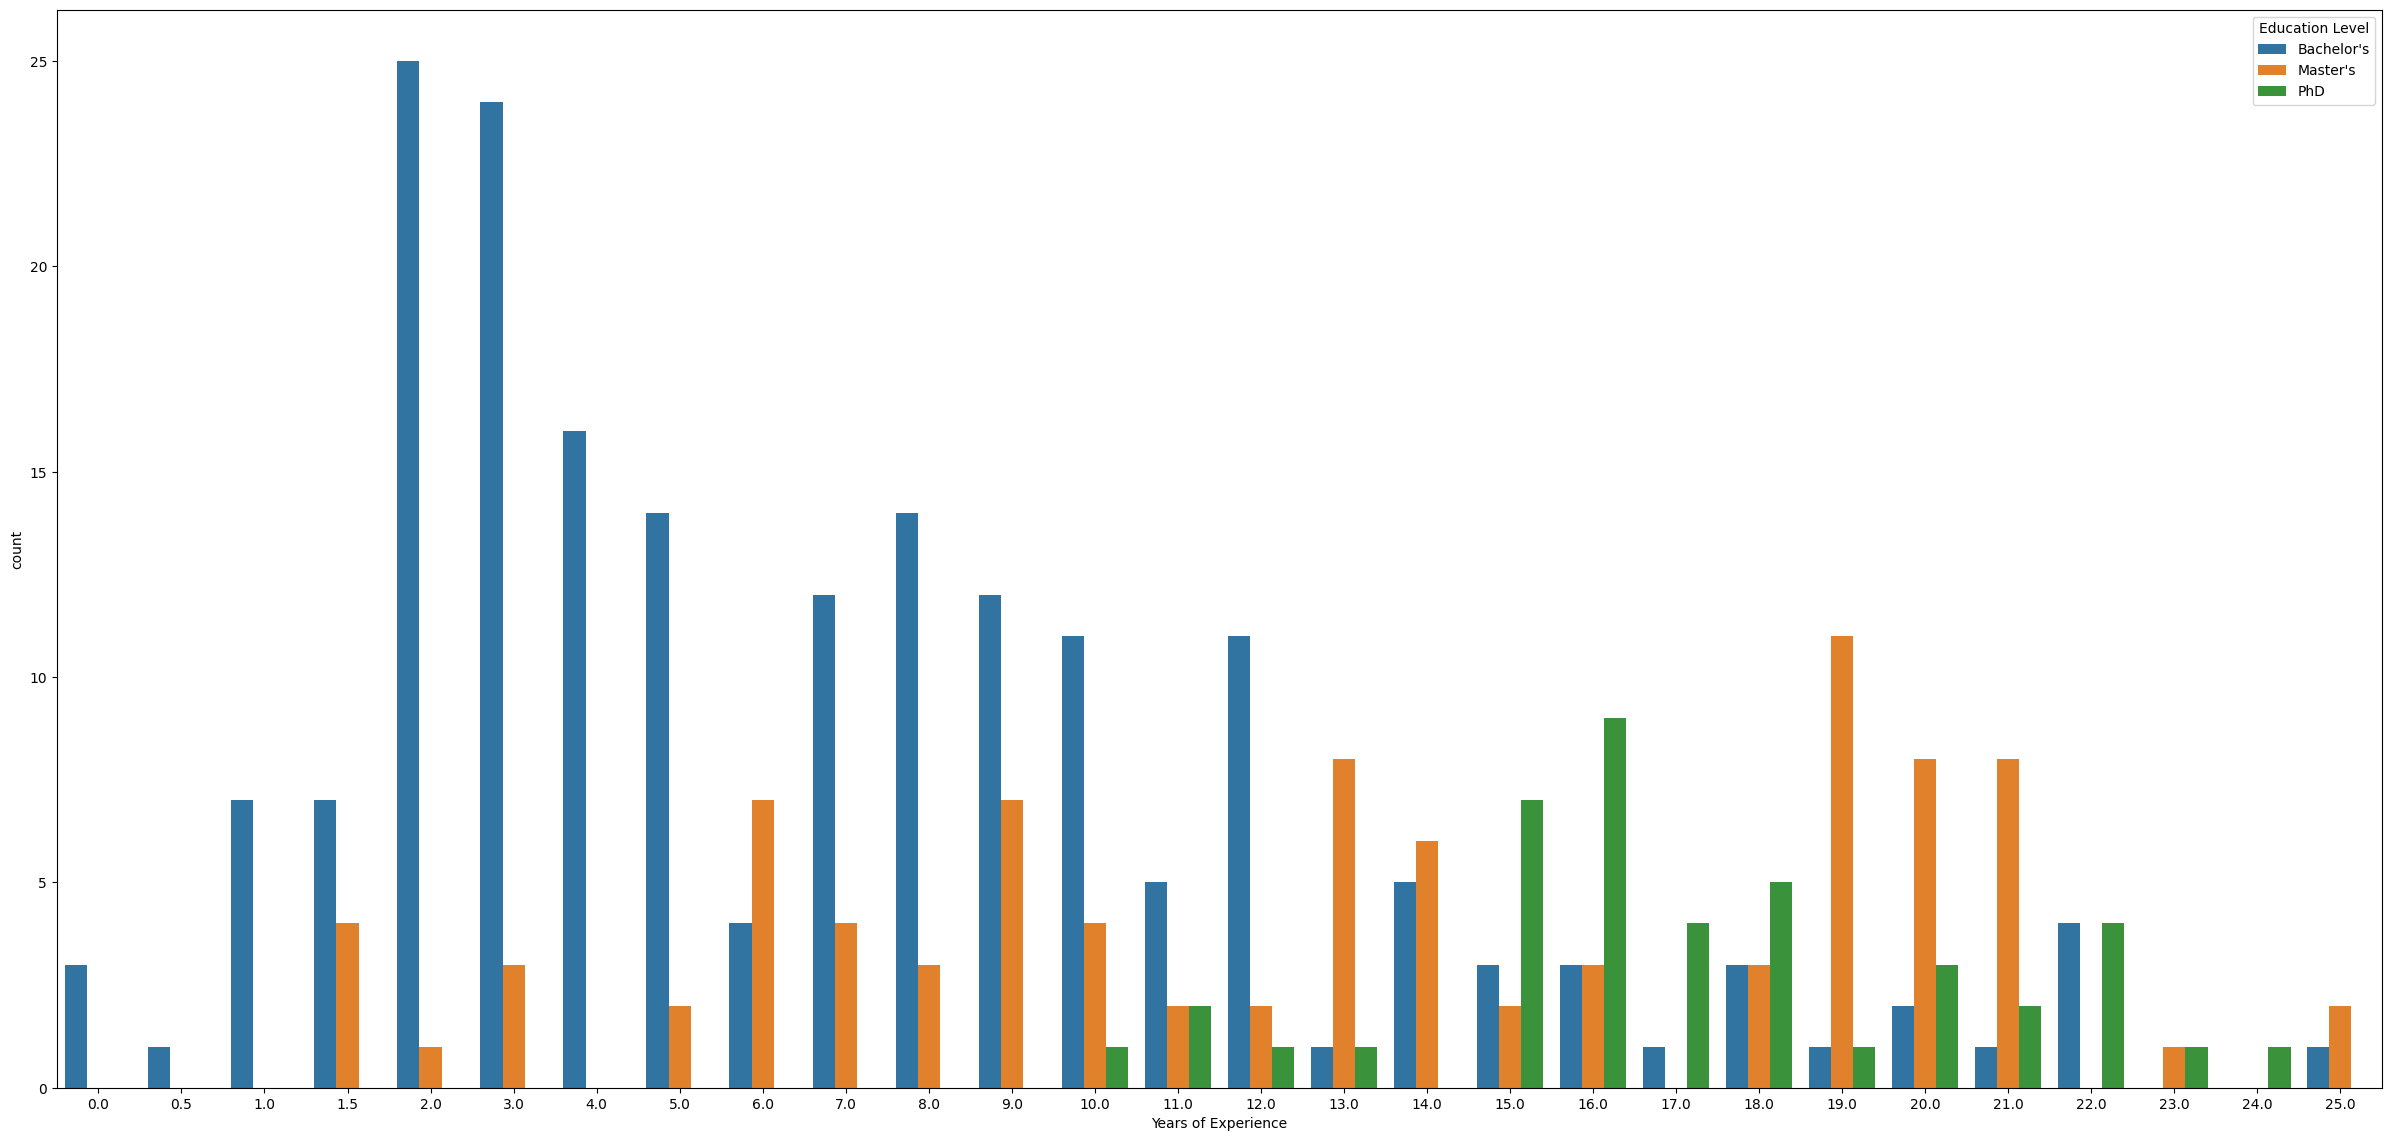

In [12]:
plt.figure(figsize=(30,14))
sns.countplot(data =data_df, x = 'Years of Experience', hue = 'Education Level')
plt.show()

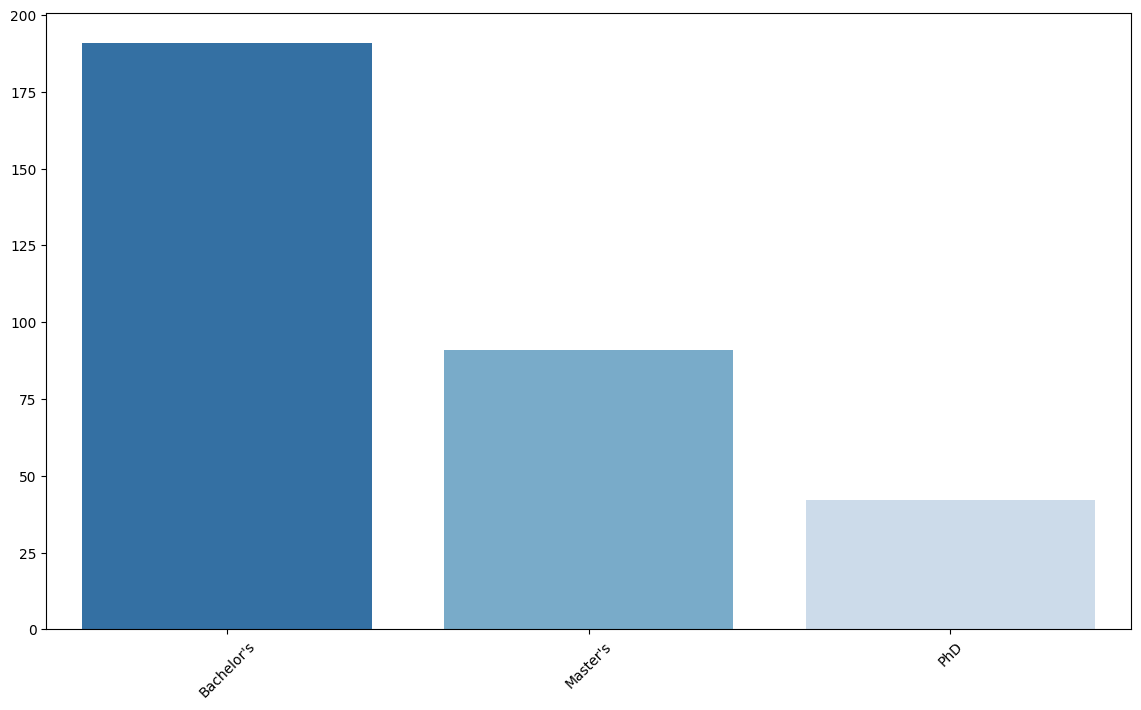

In [13]:
degree_t = data_df['Education Level'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x =degree_t.index , y =degree_t.values ,palette="Blues_r" )
plt.xticks(rotation = 45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

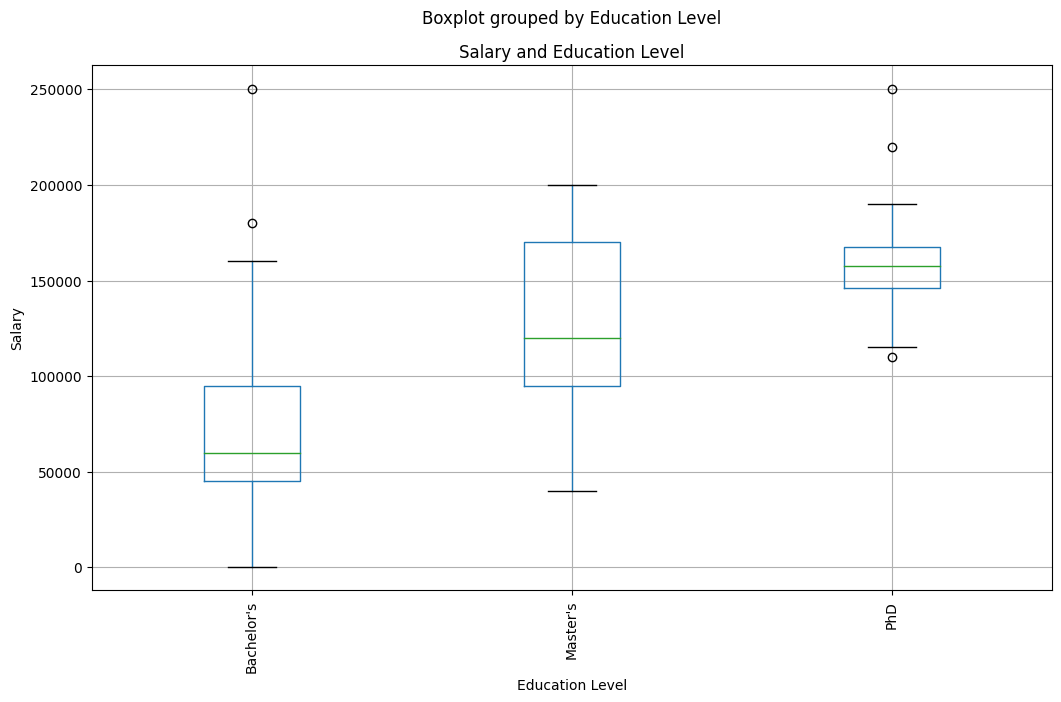

In [14]:
fig, ax=plt.subplots(1,1,figsize=(12,7))
data_df.boxplot('Salary','Education Level',ax=ax)
plt.title('Salary and Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show

<Axes: xlabel='Salary', ylabel='Density'>

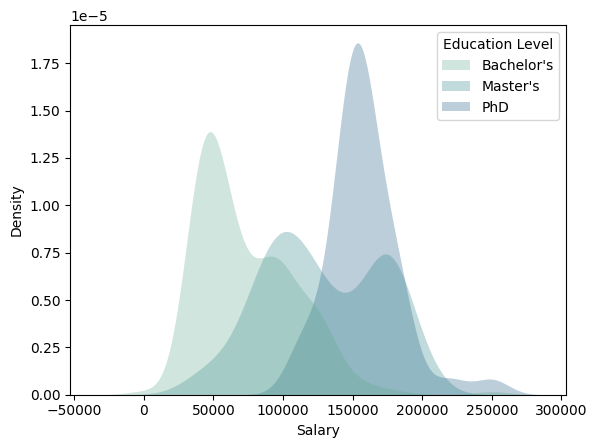

In [15]:
sns.kdeplot(
   data=data_df, x="Salary", hue="Education Level",
   fill=True, common_norm=False, palette="crest",
   alpha=.3, linewidth=0,
)

In [16]:
from sklearn.preprocessing import LabelEncoder
data_df.dropna(inplace=True)
data_df.drop_duplicates()
data_df['Gender'].unique()
gender_label = LabelEncoder()
data_df['Gender']=gender_label.fit_transform(data_df['Gender'])
edu_label_encoder = LabelEncoder()
data_df['Education Level'] = edu_label_encoder.fit_transform(data_df['Education Level'])
job_title_encoder = LabelEncoder()
data_df['Job Title']=job_title_encoder.fit_transform(data_df['Job Title'])
data_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


In [18]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00


In [19]:
from pycaret.regression import *
s = setup(data = data_df, target = 'Salary', session_id=123)

,Description,Value
0,Session id,123
1,Target,Salary
2,Target type,Regression
3,Original data shape,"(324, 6)"
4,Transformed data shape,"(324, 6)"
5,Transformed train set shape,"(226, 6)"
6,Transformed test set shape,"(98, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [20]:
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9950.7316,192145171.2828,13615.5479,0.9068,0.2286,0.6018,0.1420
et,Extra Trees Regressor,9669.3504,201700426.9769,13932.0075,0.9032,0.3130,0.5574,0.3560
gbr,Gradient Boosting Regressor,9950.6846,220388757.8692,14405.3215,0.8919,0.2341,0.5863,0.1230
rf,Random Forest Regressor,10047.7620,231816260.5837,14773.1743,0.8881,0.2473,0.5700,0.4960
ridge,Ridge Regression,11555.8880,229514790.6881,14979.3650,0.8876,0.2487,0.7370,0.0390
lr,Linear Regression,11566.5742,229506155.0733,14978.9702,0.8875,0.2490,0.7383,0.3700
lasso,Lasso Regression,11566.5743,229506028.2519,14979.0061,0.8875,0.2490,0.7383,0.0390
lar,Least Angle Regression,11566.5742,229506155.0733,14978.9702,0.8875,0.2490,0.7383,0.0400
llar,Lasso Least Angle Regression,11566.4343,229506931.5505,14979.0001,0.8875,0.2490,0.7383,0.0420
br,Bayesian Ridge,11539.0002,229918406.3193,14993.0233,0.8874,0.2482,0.7332,0.0410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [21]:
X=data_df.drop('Salary',axis=1)
y=data_df['Salary']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from lightgbm import LGBMRegressor
# define the model
model = LGBMRegressor()
# fit the model on the whole dataset
model.fit(X, y)

LGBMRegressor()

In [25]:
pred=model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
error1=np.sqrt(mean_squared_error(y_test,pred))
print('The difference between the predicted value and the actual value is Rs{:,.02f}'.format(error1))

The difference between the predicted value and the actual value is Rs10,344.92


In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

r2 = r2_score(y_test, pred)
msle = mean_squared_log_error(y_test, pred)
print('R2 score: ', r2)
print("Mean squared log error: ",msle)

R2 score:  0.9541285525408155
Mean squared log error:  0.20637583189741238


In [30]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

>10 -531781348.837 (180615545.180)
>50 -220092390.170 (112338954.209)
>100 -222139342.488 (101185401.276)
>500 -230701825.726 (102027418.885)
>1000 -240095020.913 (113266500.320)
>5000 -259674657.143 (128974721.089)


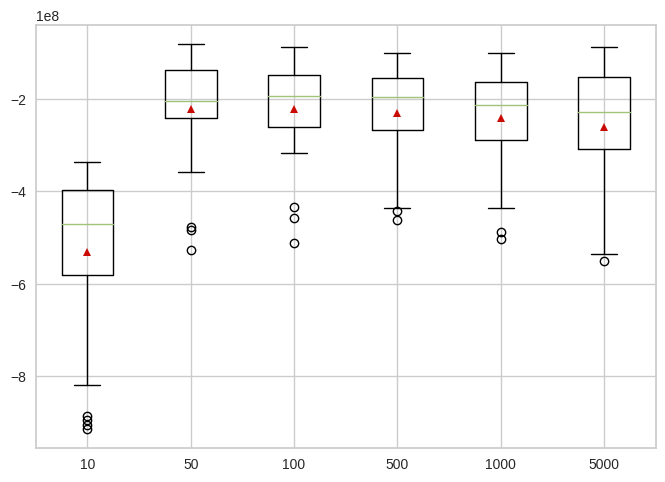

In [35]:
#LightGBM Hyperparameters
# explore lightgbm number of trees effect on performance 

def get_models():
  models = dict()
  trees = [10, 50, 100, 500, 1000, 5000]
  
  for n in trees:
    models[str(n)] = LGBMRegressor(n_estimators=n)
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 -265348541.750 (131966363.051)
>2 -227006418.211 (109868823.078)
>3 -224935663.645 (103943368.940)
>4 -221559254.937 (101282922.834)
>5 -220254416.780 (100361681.865)
>6 -220956428.739 (99884351.493)
>7 -220864508.849 (101299873.760)
>8 -221588885.907 (100878393.649)
>9 -221602582.901 (101896455.800)
>10 -221928148.790 (100946542.041)


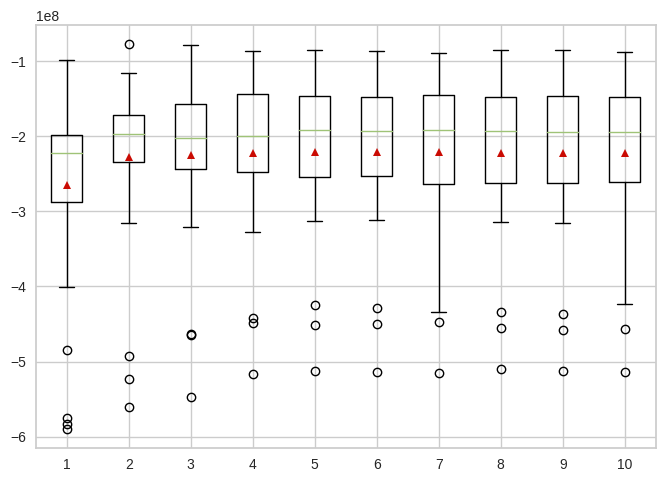

In [36]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(1,11):
  models[str(i)] = LGBMRegressor(max_depth=i, num_leaves=2**i)
 return models
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.0001 -2325596705.502 (371601482.019)
>0.0010 -1991038086.560 (337664245.253)
>0.0100 -558455514.337 (188034236.137)
>0.1000 -222139342.488 (101185401.276)
>1.0000 -263462320.411 (113302493.177)


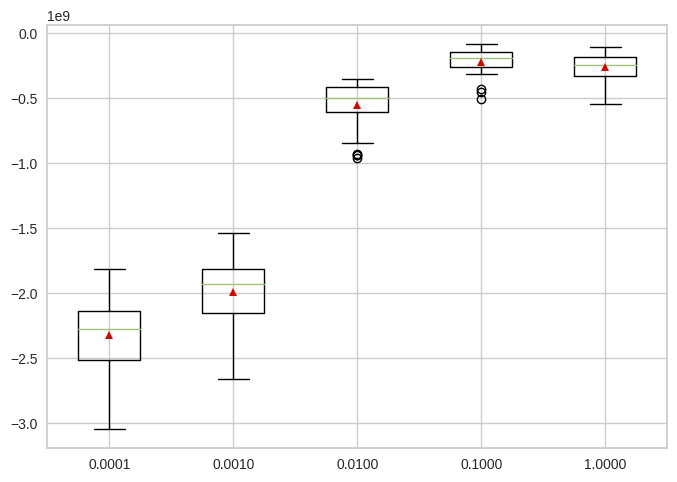

In [37]:
# get a list of models to evaluate
def get_models():
 models = dict()
 rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
 for r in rates:
  key = '%.4f' % r
  models[key] = LGBMRegressor(learning_rate=r)
 return models


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()